In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
customer_data = pd.read_excel("OneDrive/Documents/purchase_behaviour.xlsx")

In [14]:
customer_data.head

<bound method NDFrame.head of        LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]>

In [15]:
transaction_data = pd.read_excel("OneDrive/Documents/transaction_data.xlsx")

In [16]:
transaction_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [19]:
transaction_data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [25]:
transaction_data.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

In [27]:
# Examine PROD_NAME
print(transaction_data['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64


In [31]:
#Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips
product_words = transaction_data['PROD_NAME'].str.split(expand=True).stack().value_counts()
print(product_words)

175g        60561
Chips       49770
150g        41633
Kettle      41288
&           35565
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Name: count, Length: 220, dtype: int64


In [48]:
# Remove salsa products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.lower().str.contains('salsa')]

In [49]:
 #Summarise the data to check for nulls and possible outliers
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [51]:
# Filter the dataset to find the outlier
transaction_data [transaction_data ['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [52]:
# Let's see if the customer has had other transactions

transaction_data [transaction_data ['LYLTY_CARD_NBR'] ==226000 ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [53]:
# Filter out the customer based on the Loyalty card number

transaction_data [transaction_data ['LYLTY_CARD_NBR'] !=226000 ]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [54]:
# Re-examine transaction data
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [60]:
# Count the number of transactions by date
transaction_by_date = transaction_data.groupby ('DATE')['TXN_ID'].count() 

In [58]:
transaction_by_date

DATE
2018-07-01    663
2018-07-02    650
2018-07-03    674
2018-07-04    669
2018-07-05    660
             ... 
2019-06-26    657
2019-06-27    669
2019-06-28    673
2019-06-29    703
2019-06-30    704
Name: TXN_ID, Length: 364, dtype: int64

In [63]:
# Create a sequence of dates and join this the count of transactions by date



all_dates = pd.date_range(start='2018-07-01', end='2019-06-30')
transaction_by_day = pd.merge(pd.DataFrame(all_dates, columns=['DATE']), pd.DataFrame(transaction_by_date), on='DATE', how='left')

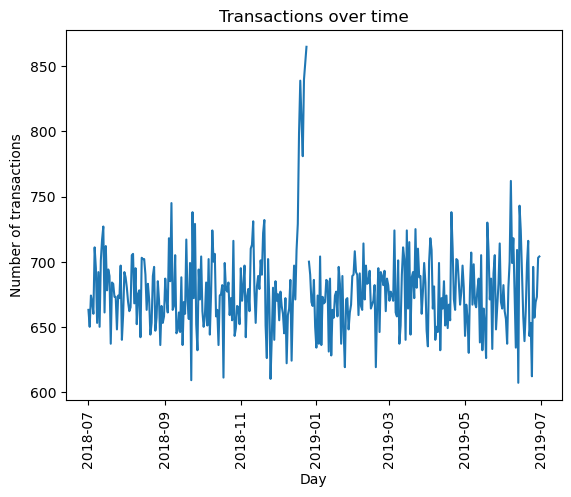

In [68]:
# Plot transactions over time

plt.plot(transaction_by_day['DATE'], transaction_by_day['TXN_ID'])
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=90)
plt.show()

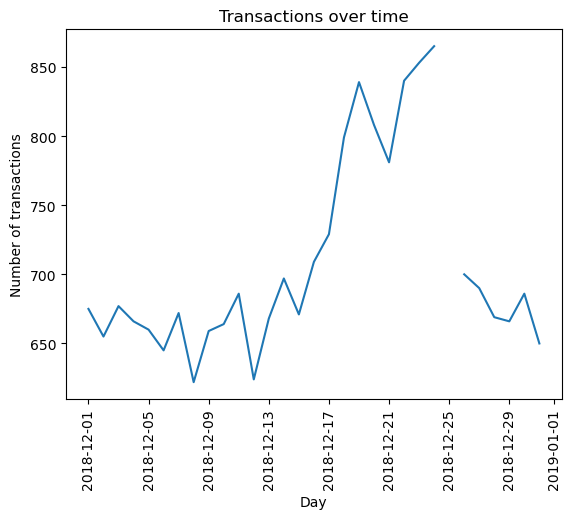

In [69]:
# Filter to December and Look at individual days

december_transactions = transaction_by_day[transaction_by_day['DATE'].dt.month == 12]
plt.plot(december_transactions['DATE'], december_transactions['TXN_ID'])
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.title('Transactions over time')
plt.xticks(rotation=90)
plt.show()

In [71]:
# to check Pack size
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)

In [72]:
# Let's check if the pack sizes look sensible
transaction_data['PACK_SIZE'].value_counts().sort_index()

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    40203
160.0     2970
165.0    15297
170.0    19983
175.0    66390
180.0     1468
190.0     2995
200.0     4473
210.0     6272
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6418
Name: count, dtype: int64

In [73]:
# checking the output of the first few rows to see if we have indeed picked out pack size.
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


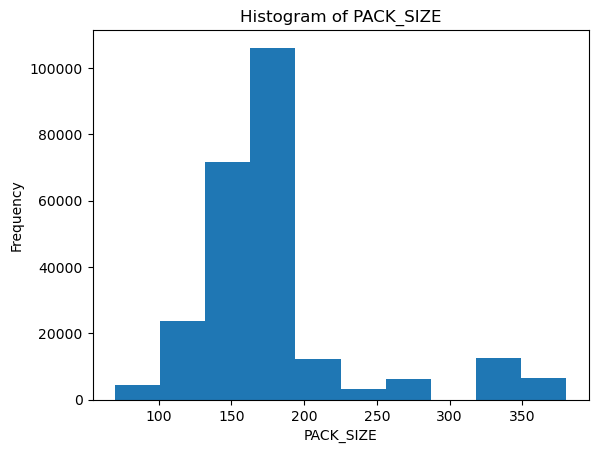

In [74]:
#  histogram of PACK_SIZE since we know that it is a categorical variable and not a continuous variable even though it is numeric.

plt.hist(transaction_data['PACK_SIZE'])
plt.xlabel('PACK_SIZE')
plt.ylabel('Frequency')
plt.title('Histogram of PACK_SIZE')
plt.show()

In [75]:
# Let's look for Brands
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0].str.upper()

In [76]:
# Checking brands

transaction_data['BRAND'].value_counts()

BRAND
KETTLE        41288
SMITHS        27390
PRINGLES      25102
DORITOS       22041
THINS         14075
RRD           11894
INFUZIONS     11057
WW            10320
COBS           9693
TOSTITOS       9471
TWISTIES       9454
TYRRELLS       6442
GRAIN          6272
NATURAL        6050
CHEEZELS       4603
CCS            4551
RED            4427
DORITO         3185
INFZNS         3144
SMITH          2963
CHEETOS        2927
SNBTS          1576
BURGER         1564
WOOLWORTHS     1516
GRNWVES        1468
SUNBITES       1432
NCC            1419
FRENCH         1418
Name: count, dtype: int64

In [77]:
# Repalcing  brand names 

transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD', 'SNBTS': 'SUNBITES', 'INFZNS': 'INFUZIONS', 'WW': 'WOOLWORTHS', 'SMITH': 'SMITHS', 'NCC': 'NATURAL', 'DORITO': 'DORITOS', 'GRAIN': 'GRNWVES'})

In [78]:
# let's check the brand names again
transaction_data['BRAND'].value_counts()

BRAND
KETTLE        41288
SMITHS        30353
DORITOS       25226
PRINGLES      25102
RRD           16321
INFUZIONS     14201
THINS         14075
WOOLWORTHS    11836
COBS           9693
TOSTITOS       9471
TWISTIES       9454
GRNWVES        7740
NATURAL        7469
TYRRELLS       6442
CHEEZELS       4603
CCS            4551
SUNBITES       3008
CHEETOS        2927
BURGER         1564
FRENCH         1418
Name: count, dtype: int64

In [81]:
# Let's Examining customer data

customer_data.head()
customer_data.dtypes
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [83]:
#Examining the values of lifestage and premium_customer

customer_data['LIFESTAGE'].value_counts()
customer_data['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [84]:
#  Merge transaction data to customer data
data = pd.merge(transaction_data, customer_data, on='LYLTY_CARD_NBR', how='left')

In [85]:
#   Let's also check if some customers were not matched on by checking for nulls.
data.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [86]:
#  Total sales by LIFESTAGE and PREMIUM_CUSTOMER

sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

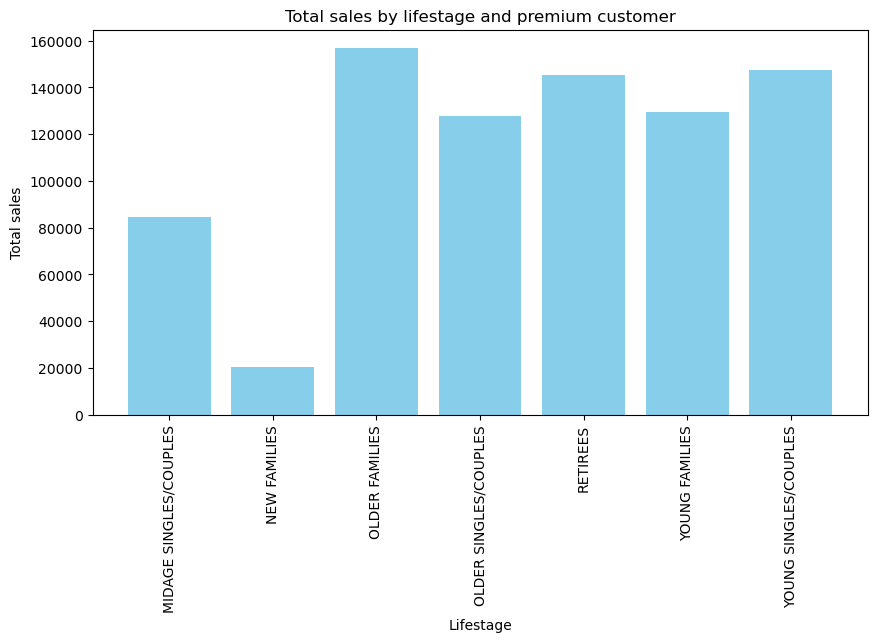

In [87]:
#  Create plot Total sales by lifestage and premium customer

plt.figure(figsize=(10, 5))
plt.bar(sales['LIFESTAGE'], sales['TOT_SALES'], color='skyblue')
plt.xlabel('Lifestage')
plt.ylabel('Total sales')
plt.title('Total sales by lifestage and premium customer')
plt.xticks(rotation=90)
plt.show()

In [91]:
#Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customers = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

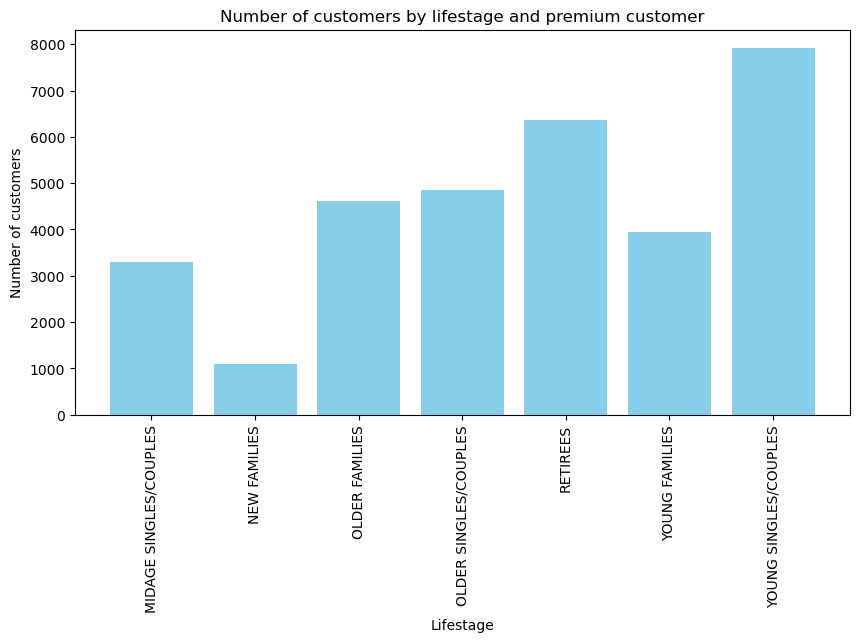

In [92]:
#   Create plot Number of customers by lifestage and premium customer

plt.figure(figsize=(10, 5))
plt.bar(customers['LIFESTAGE'], customers['LYLTY_CARD_NBR'], color='skyblue')
plt.xlabel('Lifestage')
plt.ylabel('Number of customers')
plt.title('Number of customers by lifestage and premium customer')
plt.xticks(rotation=90)
plt.show()

In [93]:
# Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

avg_units = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

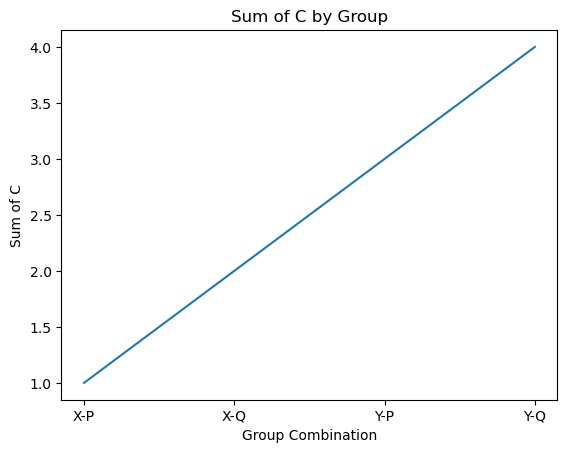

In [101]:
#  Create plot

data = pd.DataFrame({'A': ['X', 'X', 'Y', 'Y'], 'B': ['P', 'Q', 'P', 'Q'], 'C': [1, 2, 3, 4]})
grouped = data.groupby(['A', 'B'])['C'].sum()

t
plt.plot(['-'.join(col) for col in grouped.index.values], grouped.values)
plt.xlabel('Group Combination')
plt.ylabel('Sum of C')
plt.title('Sum of C by Group')
plt.show()

In [95]:
#Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum() / data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Premium             150
RETIREES                Mainstream          200
YOUNG SINGLES/COUPLES   Budget              100
Name: TOT_SALES, dtype: int64


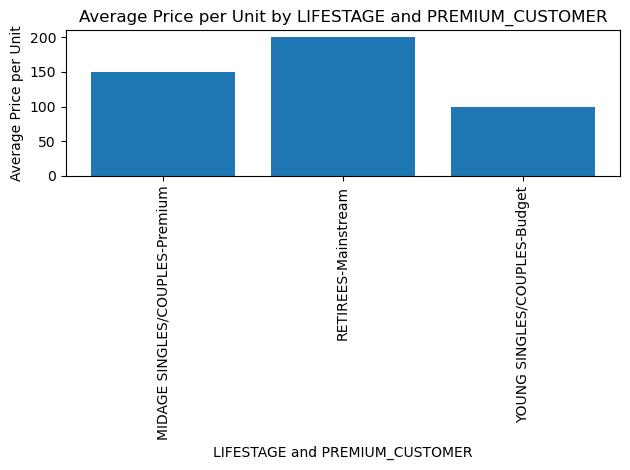

Index(['PREMIUM_CUSTOMER', 'LIFESTAGE', 'TOT_SALES'], dtype='object')


In [113]:
#  Create plot Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER


df = pd.DataFrame({
    'PREMIUM_CUSTOMER': ['Budget', 'Mainstream', 'Premium'],
    'LIFESTAGE': ['YOUNG SINGLES/COUPLES', 'RETIREES', 'MIDAGE SINGLES/COUPLES'],
    'TOT_SALES': [100, 200, 150]
})

try:
    avg_price = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
    print(avg_price)

    # Define x_labels here
    x_labels = ['-'.join(map(str, idx)) for idx in avg_price.index]

    plt.bar(x_labels, avg_price.values)
    plt.xlabel('LIFESTAGE and PREMIUM_CUSTOMER')
    plt.ylabel('Average Price per Unit')
    plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")

print(df.columns)
